In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext rpy2.ipython

# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os, sys
import pandas as pd
# import scipy.stats as stats
# from sklearn.metrics.pairwise import cosine_similarity

sys.path.insert(0, 'src')
import utils
import visualizations
import analysis

In [ ]:
# n_per_condition = 121
# date = '11142024'
# data_id = 'pilot_v3'
# grouping_version = 'absolute_study4' # Whether to use absolute or relative for grouping Colombatto statements
conditions = ["Baseline", "Mechanistic", "Functional", "Intentional"]

baseline_df_path = '../data/baseline_raw_data.csv'
experimental_df_path = '../data/experimental_raw_data.csv'
# baseline_df_path = 'data/{}_{}/{}_baseline.csv'.format(data_id, date, date)
# experimental_df_path = 'data/{}_{}/{}_experimental.csv'.format(data_id, date, date)

baseline_df = utils.read_file(baseline_df_path)
experimental_df = utils.read_file(experimental_df_path)

# Make 'Finished' column all upper case and select data rows that are completed
baseline_df['Finished'] = baseline_df['Finished'].str.upper()
experimental_df['Finished'] = experimental_df['Finished'].str.upper()

# Only select finished rows
baseline_df = baseline_df[baseline_df['Finished'] == 'TRUE']
experimental_df = experimental_df[experimental_df['Finished'] == 'TRUE']
# Merge baseline and experimental conditions data
df = pd.merge(baseline_df, experimental_df, how='outer')

utils.informal_log("In total: {} rows".format(len(df)))

# Print # rows in each condition
utils.informal_log("Baseline: {} rows".format(len(baseline_df)))
utils.informal_log("Mechanistic: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Mechanistic'])))
utils.informal_log("Functional: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Functional'])))
utils.informal_log("Intentional: {} rows".format(len(experimental_df[experimental_df['CONDITION'] == 'Intentional'])))


# assert len(baseline_df) == n_per_condition, "Expected {} rows in baseline dataframe, received {}".format(n_per_condition, len(baseline_df))
# assert len(experimental_df) == n_per_condition * 3, "Expected {} rows in experimental dataframe, received {}".format(n_per_condition * 3, len(experimental_df))

[0426_081256] In total: 489 rows
[0426_081256] Baseline: 124 rows
[0426_081256] Mechanistic: 121 rows
[0426_081256] Functional: 122 rows
[0426_081256] Intentional: 122 rows


### Make save_dirs

In [61]:
# Exclusion parameters
# min_n_responses = None
min_survey_time = round(80 / 60, 4) # ~80 seconds
min_median_per_page_time = round(1 / 60, 4) # ~1 second
# exclude_high_leverage = False
# manual_exclusions = None
post_attention_check = True

'''
Commonly used Paths/Items
'''
PATH_TO_ROOT = '..'
overwrite = False
items_path = os.path.join(PATH_TO_ROOT, 'data/mental_capacity_items.txt')
categories_path = os.path.join(PATH_TO_ROOT, 'data/category_groupings.json')
save_ext = 'pdf'
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)

attitudes = {
    'DVSE1': 'se_how',
    'DVSE2': 'se_use',
    'DVTrust': 'trust',
    'DVGeneral': 'feeling',
    'DVCoarse1': 'humanness',
    'CQ1': 'confidence'
}
# condition_color_idxs = [7, 1, 2, 4]
# # Save figures as PDF (for paper) or SVG (for talks)
# save_ext = "pdf"
'''
Save dirs
'''

# Make save directory
save_dir = os.path.join(PATH_TO_ROOT, 'analysis')
utils.ensure_dir(save_dir)
utils.informal_log("Parent save directory: {}".format(save_dir))
# Timing save dir
time_save_dir = os.path.join(save_dir, 'timings')
utils.ensure_dir(time_save_dir)
utils.informal_log("Timing save directory: {}".format(time_save_dir))

# Make analysis save_dir
# analysis_save_dir = os.path.join(
#     save_dir,
#     'min_time_{}'.format(min_survey_time),
#     'manual_{}'.format(len(manual_exclusions) if manual_exclusions is not None else 0))
# utils.ensure_dir(analysis_save_dir)

# Demographics post-exclusions
demographics_save_dir = os.path.join(save_dir, 'demographics')
utils.ensure_dir(demographics_save_dir)
utils.informal_log("Demographics save directory: {}".format(demographics_save_dir))

# Ratings CSV save dir
ratings_save_dir = os.path.join(save_dir, 'mental_capacities')
ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
utils.ensure_dir(ratings_save_dir)
utils.informal_log("Mental capacity save directory: {}".format(ratings_save_dir))

# Rating statistics save directory
rating_stats_save_dir = os.path.join(ratings_save_dir, 'statistics')
utils.ensure_dir(rating_stats_save_dir)
utils.informal_log("Mental capacity ratings statistics save directory: {}".format(rating_stats_save_dir))

# Graph from data save dir
# data_graph_save_dir = os.path.join(ratings_save_dir, 'graphs', 'condition_differences')
# utils.ensure_dir(data_graph_save_dir)

# Graph for single items
# single_item_graph_save_dir = os.path.join(ratings_save_dir, 'graphs', 'single_item')
# utils.ensure_dir(single_item_graph_save_dir)

# Participant Correlation save dir
corr_save_dir = os.path.join(save_dir, 'correlations')
utils.ensure_dir(corr_save_dir)
utils.informal_log("Correlations save directory: {}".format(ratings_save_dir))

# Leverage save dir
# outlier_save_dir = os.path.join(ratings_save_dir, 'leverage')
# utils.ensure_dir(outlier_save_dir)

# R CSV save dir for Body Heart Mind
R_input_dir = os.path.join(ratings_save_dir, 'body-heart-mind', 'R', 'input_files')
utils.ensure_dir(R_input_dir)

# R results save dir for Body Heart Mind
R_results_save_dir = os.path.join(ratings_save_dir, 'body-heart-mind', 'R', 'results')
utils.ensure_dir(R_results_save_dir)

# Save dir for factor analysis
fa_save_dir = os.path.join(ratings_save_dir, 'factor_analysis')
utils.ensure_dir(fa_save_dir)

# Save dir for k-fold factor analysis
fa_kfold_save_dir = os.path.join(fa_save_dir, 'kfold')
utils.ensure_dir(fa_kfold_save_dir)

# Save dir for factor analysis results
fa_results_save_dir = os.path.join(fa_save_dir, 'results')
utils.ensure_dir(fa_results_save_dir)

# Save dir for R analysis based on factor loading groupings
fa_R_input_dir = os.path.join(fa_results_save_dir, 'R', 'input_files')
utils.ensure_dir(fa_R_input_dir)

# Save dir for R analysis output based on factor loading groupings
fa_R_results_dir = os.path.join(fa_results_save_dir, 'R', 'results')
utils.ensure_dir(fa_R_results_dir)

# item-level analyses with R save dir
item_level_save_dir = os.path.join(ratings_save_dir, 'item_level')
utils.ensure_dir(item_level_save_dir)
# item_level_R_results_save_dir = os.path.join(R_results_save_dir, 'item_level_analysis')
# utils.ensure_dir(item_level_R_results_save_dir)

# Attitudes save dir
attitudes_save_dir = os.path.join(save_dir, 'attitudes')
utils.ensure_dir(attitudes_save_dir)

# Attitudes Graph save dir
# addit_dv_graph_save_dir = os.path.join(attitudes_save_dir, 'graphs')
# utils.ensure_dir(addit_dv_graph_save_dir)

# Attitudes R CSV save dir
addit_dv_r_csv_save_dir = os.path.join(attitudes_save_dir, 'R', 'input_files')
utils.ensure_dir(addit_dv_r_csv_save_dir)

# Attitudes R results save dir
addit_dv_r_result_save_dir = os.path.join(attitudes_save_dir, 'R', 'results')
utils.ensure_dir(addit_dv_r_result_save_dir)

# Exploratory analysis save dir
exploratory_save_dir = os.path.join(save_dir, 'exploratory')

# Mentioned/Unmentioned save dir
mentioned_save_dir = os.path.join(exploratory_save_dir, 'mentioned_analysis')
utils.ensure_dir(mentioned_save_dir)

mentioned_R_csv_save_dir = os.path.join(mentioned_save_dir, 'R', 'input_files')
utils.ensure_dir(mentioned_R_csv_save_dir)

mentioned_R_result_save_dir = os.path.join(mentioned_save_dir, 'R', 'results')
utils.ensure_dir(mentioned_R_result_save_dir)
# Attitudes Correlations save dir
correlation_dir = os.path.join(exploratory_save_dir, 'correlations')
utils.ensure_dir(correlation_dir)

# # Attitudes Mechanistic quiz save dir
# mech_save_dir = os.path.join(attitudes_save_dir, 'mechanistic_quiz')
# utils.ensure_dir(mech_save_dir)

# # EMMeans graph broken by category save dir
# emmeans_category_graph_save_dir = os.path.join(R_results_save_dir, 'emmeans_category_graphs')
# utils.ensure_dir(emmeans_category_graph_save_dir)

# # EMMeans graph condition only save dir
# emmeans_graph_save_dir = os.path.join(R_results_save_dir, 'emmeans_graphs')
# utils.ensure_dir(emmeans_graph_save_dir)

# Reliability save dir
reliability_save_dir = os.path.join(exploratory_save_dir, 'reliability')
utils.ensure_dir(reliability_save_dir)

# Semantic analysis embedding dir
# semantic_analysis_data_dir = os.path.join('dependent_variables', 'semantic_analysis')
# semantic_analysis_save_dir = os.path.join(ratings_save_dir, 'semantic_analysis')
# semantic_analysis_graph_save_dir = os.path.join(semantic_analysis_save_dir, "emmeans_graph")

# utils.ensure_dir(semantic_analysis_data_dir)
# utils.ensure_dir(semantic_analysis_save_dir)
# utils.ensure_dir(semantic_analysis_graph_save_dir)

[0426_103738] Parent save directory: ../analysis
[0426_103738] Timing save directory: ../analysis/timings
[0426_103738] Demographics save directory: ../analysis/demographics
[0426_103738] Mental capacity save directory: ../analysis/mental_capacities
[0426_103738] Mental capacity ratings statistics save directory: ../analysis/mental_capacities/statistics
[0426_103738] Correlations save directory: ../analysis/mental_capacities


### Timing Analysis

In [ ]:
# Data structure to map individual questions to sections of the survey
time_mapping = {
    'intro': {
        'ConsentTime1': 'consent_time',
        'PS4': 'screening_time',
        'Q10': 'instructions_time',
        'Q12': 'check_time',
    },
    'video': {
        # Videos
        'Q14': 'mech1_time',
        'Q16': 'mech2_time',
        'Q18': 'mech3_time',
        'Q20': 'func1_time',
        'Q22': 'func2_time',
        'Q24': 'func3_time',
        'Q26': 'intent1_time',
        'Q28': 'intent2_time',
        'Q30': 'intent3_time',

    },
    'video_transition': {
        # Video -> Survey Transition
        'Q32': 'takeaways_time',
        'Q34': 'transition_time',
    },
    'survey': {
        # Survey
        'Q36': 'survey_time'
    },
    'post': {
        # 'CTime1': 'confidence_time',
        'ACTime1': 'attention_check_time',
        'DVTime1': 'addit_dvs1_time',
        'DVTime2': 'addit_dvs2_time',
        'Q42': 'mech_conceptual_time',
        'DQTime1': 'demographic_time',
        'Q44': 'intent_eos_time',
        'Q46': 'eos_time'
    }
}

metadata_column_mapping = {
    'Duration (in seconds)': 'total_time',
    'CONDITION': 'condition',
    'ResponseId': 'response_id',
    'PROLIFIC_PID': 'prolific_id'
}

In [ ]:
# Time analysis on all data (baseline + experimental)
time_df = analysis.time_analysis(
    df=df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='all',
    save_dir=time_save_dir,
    overwrite=overwrite)

time_stats_df = analysis.time_stats(
    time_df=time_df,
    condition='all',
    save_dir=time_save_dir,
    overwrite=overwrite)

# Time analysis on baseline data
baseline_time_df = analysis.time_analysis(
    df=baseline_df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='baseline',
    save_dir=time_save_dir,
    overwrite=overwrite)

baseline_time_stats_df = analysis.time_stats(
    time_df=baseline_time_df,
    condition='baseline',
    save_dir=time_save_dir,
    overwrite=overwrite)

# Time analysis on experimental data
experimental_time_df = analysis.time_analysis(
    df=experimental_df,
    mapping=time_mapping,
    metadata_mapping=metadata_column_mapping,
    condition='exp',
    save_dir=time_save_dir,
    overwrite=overwrite)

experimental_time_stats_df = analysis.time_stats(
    time_df=experimental_time_df,
    condition='exp',
    save_dir=time_save_dir,
    overwrite=overwrite)

# Append each user's time in raw dataframe
if 'survey_time' not in df.columns:
    df = pd.concat([df, time_df['survey']], axis=1)
    df = df.rename(columns={'survey': 'survey_time'})
    df = pd.concat([df, time_df[['median_time_per_survey_page', 'min_time_per_survey_page', 'max_time_per_survey_page']]], axis=1)

    utils.informal_log("Added time columns to DF ({} rows)".format(len(df)))

[0426_081303] Time analysis exists at ../analysis/timings/time_analysis_all_minutes.csv
[0426_081303] Timing statistics exists at ../analysis/timings/timing_stats_all_minutes.csv
[0426_081303] Time analysis exists at ../analysis/timings/time_analysis_baseline_minutes.csv
[0426_081303] Timing statistics exists at ../analysis/timings/timing_stats_baseline_minutes.csv
[0426_081303] Time analysis exists at ../analysis/timings/time_analysis_exp_minutes.csv
[0426_081303] Timing statistics exists at ../analysis/timings/timing_stats_exp_minutes.csv
[0426_081303] Added time columns to DF (489 rows)


### Save FRQ responses to the post-video transition (Optional)

In each experimental condition, we asked participants "Please list 1-2 things you learned from the videos."
TODO: Move to bottom for exploratory analysis

In [14]:
q_id = 'Q31'
frq_addit_qid = 'CONDITION'
frq_save_path = os.path.join(save_dir, 'frq', 'frq_responses.txt')
utils.ensure_dir(os.path.dirname(frq_save_path))
utils.informal_log("Saving FRQ responses to {}".format(frq_save_path))
frq_df = analysis.save_frq(
    df=df,
    q_id=q_id,
    addit_q_id=frq_addit_qid,
    frq_save_path=frq_save_path)

[0417_144758] Saving FRQ responses to ../analysis/frq/frq_responses.txt
[0417_144758] 66fc12c9f1dfb65972597a3f [Intentional]: 
	i learned about AI a bit more and LLMs, and how AI learn to speak like us and be relatable
[0417_144758] 6674e27d7068f7b381b54c73 [Mechanistic]: 
	LLM's predict words and process a large amount of data
[0417_144758] 610786681f59e722c0a8b371 [Functional]: 
	I was not aware of the definition of a LLM, I learned that services like Chat GPT are considered LLM's. I didn't know that they learned the info they know from studying large sets of data and looking for patterns.
[0417_144758] 66952d5507cd937cf7c2a35d [Functional]: 
	LLMs need to learn from a very large text of data and finds patterns in the information to learn. It's best to be specific in what you are asking to get the answer you are looking for.
[0417_144758] 6157d22b9998f96a77f41567 [Mechanistic]: 
	LLMs use attention mechanism. They predict the next word in a string and also look at probabilities and t

### Perform Exclusions

In [6]:


# if exclude_high_leverage:
#     utils.informal_log("Exclude high leverage is true. Please enter path to high_leverage.csv")

#     leverage_csv_path = input()
#     leverage_df =utils.read_file(leverage_csv_path)
#     utils.informal_log("Reading high leverage from {}".format(leverage_csv_path))
#     # Manually exclude high leverage
#     manual_exclusions = leverage_df['pid'].to_list()
#     utils.informal_log("Manually excluding {} participants with high leverage".format(len(manual_exclusions)))

# Get DF post exclusions
post_exclusion_df = analysis.perform_exclusions(
    df=df,
    min_survey_time=min_survey_time,
    min_median_per_page_time=min_median_per_page_time,
    # max_median_diff=max_median_diff,
    manual_exclusions=None,
    post_attention_check=post_attention_check)

exclusion_params = {
    # 'min_n_responses': min_n_responses,
    'min_survey_time': min_survey_time,
    'min_median_per_page_time': min_median_per_page_time,
    # 'max_median_diff': max_median_diff,
    # 'manual_exclusions': manual_exclusions,
    'n_rows': len(post_exclusion_df)
}

exclusion_param_save_path = os.path.join(ratings_save_dir, 'exclusion_params.json')
if os.path.exists(exclusion_param_save_path):
    utils.informal_log("Exclusion parameters already exist at {}. Meaning this directory contains some exclusion configuration. Save to another directory".format(
        exclusion_param_save_path
    ))
else:
    utils.write_file(exclusion_params, exclusion_param_save_path)

[0426_081308] 476 rows remaining post filtering for minimum of 1.3333 minutes on survey
[0426_081308] 476 rows remaining post filtering for minimum median of 0.0167 minutes on each survey page
[0426_081308] 470 rows remaining post filtering for post-survey attention check correctness
[0426_081308] No manual exclusions performed
[0426_081308] Number of rows: 470
[0426_081308] Number of rows in baseline: 118
[0426_081308] Number of rows in mechanistic: 116
[0426_081308] Number of rows in functional: 119
[0426_081308] Number of rows in intentional: 117
[0426_081308] Exclusion parameters already exist at ../analysis/mental_capacities/exclusion_params.json. Meaning this directory contains some exclusion configuration. Save to another directory


#### Print responses for attention check (opt)

In [ ]:
# def examine_attention_check(df):
#     '''
#     Given a dataframe, return the rows that pass the attention check
#     '''
#     # Extract column
#     ac_response = df['ACQ1']
#     # Obtain number of
#     response_count = {}
#     for response in ac_response:
#         print(response)
#         items = response.split(',')
#         for item in items:
#             if item in response_count:
#                 response_count[item] += 1
#             else:
#                 response_count[item ] = 1
#     print(response_count)
# examine_attention_check(df)

understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,riding a bike
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computations
understanding how others are feeling,doing computatio

### Demographic Data

Obtain demographic data post exclusions

In [7]:
demographic_qs = {
    'DQ2': 'age',
    'DQ3': 'education',
    'DQ4': 'gender',
    'DQ5': 'race',
    'DQ6': 'ethnicity',
    'DQ7': 'religion',
    'DQ9': 'programming',
    'DQ10_1': 'familiarity_chatgpt',
    'DQ10_2': 'familiarity_gemini',
    'DQ10_3': 'familiarity_claude',
    'DQ10_4': 'familiarity_copilot',
    'DQ10_5': 'familiarity_replika',
    'DQ10_6': 'familiarity_nomi',
    'DQ10_7': 'familiarity_characterai'
}

analysis.get_demographics(
    df=post_exclusion_df,
    demographic_qs=demographic_qs,
    save_dir=demographics_save_dir,
    overwrite=overwrite)

,variable,level,count,percent
0,age,25-34,137,29.148936
1,age,35-44,119,25.319149
2,age,45-54,109,23.191489
3,age,55-64,65,13.829787
4,age,65+,23,4.893617
...,...,...,...,...
88,familiarity_characterai,"Heard of it, but never used it",159,33.829787
89,familiarity_characterai,"Have used it a few times, but not regularly",20,4.255319
90,familiarity_characterai,Use 1-2x times a month,6,1.276596
91,familiarity_characterai,Use 1-2x a week,2,0.425532


### Clean data to obtain dataframe of ratings

Filter out other information besides participant's ratings on each of the 40 mental capacity items, condition, and prolificID.

#### Analysis for obtaining mean of each condition and category. Double check variables `n_pages`, `n_items_per_page` and `q_id` are correct

In [7]:
# grouping_version = 'absolute'

# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']
items = utils.read_file(items_path)
groupings = utils.read_file(categories_path)
n_pages = 40
n_items_per_page = 1
q_id = 'Q35'

n_total = n_pages * n_items_per_page
# if min_n_responses is not None and min_n_responses > n_total:
#     raise ValueError("min_n_responses ({})cannot be greater than total items ({})".format(
#         min_n_responses, n_total
#     ))

# ratings_save_dir = os.path.join(analysis_save_dir, 'groupings_{}'.format(grouping_version))

# utils.ensure_dir(ratings_save_dir)
columns = df.columns

# MC = mental capacity
mc_mapping = analysis.get_mc_mapping(
    items=items,
    n_pages=n_pages,
    n_items_per_page=n_items_per_page,
    q_id=q_id,
    columns=columns
)

# Make dataframe of ratings (rows = participants; columns = mental states)
rating_df = analysis.get_ratings(
    df=post_exclusion_df,
    mc_mapping=mc_mapping,
    groupings=groupings,
    n_total=n_total,
    save_dir=ratings_save_dir,
    overwrite=overwrite)

# Get mean (and std) ratings of each mental state in separate dataframes for each condition
stats_dfs = analysis.mean_ratings(
    rating_df=rating_df,
    save_conditions=True,
    save_dir=rating_stats_save_dir,
    overwrite=overwrite)

# Combine list of stats for each condition into one large DF
master_stats = analysis.create_master_stats(
    stats_dfs=stats_dfs,
    save_dir=rating_stats_save_dir,
    overwrite=overwrite)

[0426_081316] Ratings exists at ../analysis/mental_capacities/ratings.csv
[0426_081316] Rating statistics exists at ../analysis/mental_capacities/statistics/rating_stats.csv
[0426_081316] Rating statistics exists at ../analysis/mental_capacities/statistics/mechanistic_rating_stats.csv
[0426_081316] Rating statistics exists at ../analysis/mental_capacities/statistics/functional_rating_stats.csv
[0426_081316] Rating statistics exists at ../analysis/mental_capacities/statistics/intentional_rating_stats.csv
[0426_081316] Rating statistics exists at ../analysis/mental_capacities/statistics/baseline_rating_stats.csv
[0426_081316] Master ratings exists at ../analysis/mental_capacities/statistics/all_conditions_ratings_stats.csv


#### Leverage & Influential Points (opt)

In [ ]:
# ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')


# # Read files
# rating_df = utils.read_file(ratings_path)
# items = utils.read_file(items_path)

# outlier_df = analysis.identify_outliers(
#      rating_df=rating_df,
#      items=items,
#      save_dir=outlier_save_dir,
#      overwrite=True)


[1122_182417] 38 outliers with high leverage. Mean leverage: 0.09
Saved file to data/pilot_v3_11142024/min_time_1.3333/manual_38/groupings_absolute/leverage/high_leverage.csv


### Data Prep for Mixed Effects Models using Body-Heart-Mind Categories

In [ ]:

# ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)
separate_groups = False  # If True, create separate CSV for items of different groups

rating_df = utils.read_file(ratings_path)
groupings = utils.read_file(categories_path)
utils.informal_log("Preparing dataframes for R analysis")
analysis.prepare_R_df(
    rating_df=rating_df,
    groupings=groupings,
    save_dir=R_input_dir,
    separate_groups=separate_groups,
    overwrite=overwrite)

utils.informal_log("\nCopying item groupings with R formatting")
items = utils.read_file(items_path)
analysis.copy_groupings(
    groupings=groupings,
    all_items=items,
    save_dir=R_input_dir)


[0426_081319] Preparing dataframes for R analysis
File at ../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind.csv exists and not overwriting
File at ../analysis/mental_capacities/body_heart_mind/R/input_files/paths.json exists and not overwriting
[0426_081319] 
Copying item groupings with R formatting
Saved file to ../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind_body_items.txt
Saved file to ../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind_heart_items.txt
Saved file to ../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind_mind_items.txt
Saved file to ../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind_items.txt


### Run R Analysis to get effect of condition and body-heart-mind categories

In [15]:
%%R

source("src/mixed_effect_models.R")
rating_analysis(
    df_path="../analysis/mental_capacities/body_heart_mind/R/input_files/body-heart-mind.csv",
    save_dir="../analysis/mental_capacities/body_heart_mind/R/results",
    save_txt=TRUE
)

NOTE: Results may be misleading due to involvement in interactions
NOTE: Results may be misleading due to involvement in interactions
refitting model(s) with ML (instead of REML)


### Factor Analysis for bottom-up categorization

In [11]:
%%R
source("src/factor_analysis.R")

# Factor Analysis
rotate <- "varimax"
fm <- "ml" # Method
scores <- "Thurstone"
sample_seed <- 123

# Process rating_df for K-fold analysis
rating_df_path <- "../analysis/mental_capacities/ratings.csv"
rating_df <- read_rating_df(rating_df_path)

#### Perform K-Fold Cross Validation to determine number of factors by minimizing Bayesian Information Criterion (BIC)

In [12]:
%%R
# K-fold
kfold_save_dir <- "../analysis/mental_capacities/factor_analysis/kfold"
k <- 5
max_n_factors <- 6

k_fold_df <- k_fold(
    rating_df = rating_df,
    k = k,
    max_n_factors = max_n_factors,
    rotate = rotate,
    fm = fm,
    scores = scores,
    seed = sample_seed,
    save_dir = kfold_save_dir,
    overwrite = FALSE
)

# Calculate average BIC for each value of K
avg_bic <- k_fold_df %>%
  group_by(n_factors) %>%
  summarise(avg_bic = mean(bic, na.rm = TRUE))
print(avg_bic)

[1] "File exists at ../analysis/mental_capacities/factor_analysis/kfold/kfold_metrics.csv and not overwriting."
# A tibble: 6 × 2
  n_factors avg_bic
      <int>   <dbl>
1         1   -968.
2         2  -2358.
3         3  -2448.
4         4  -2442.
5         5  -2414.
6         6  -2328.


#### Visualize average BIC for each value of `n_factors`

N_factors	Mean BIC
1.0		-967.632
2.0		-2358.312
3.0		-2447.847
4.0		-2442.029
5.0		-2414.342
6.0		-2328.206
[0422_163701] Saved graph to ../analysis/mental_capacities/factor_analysis/kfold/bic.pdf


<Figure size 640x480 with 0 Axes>

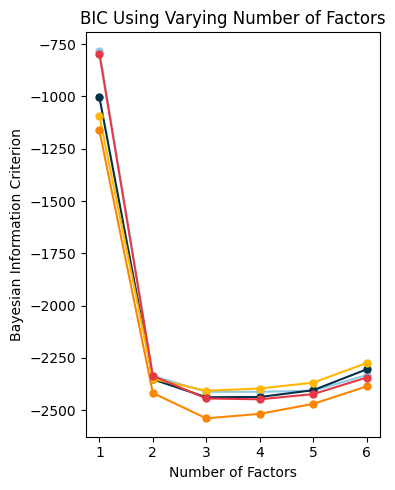

In [36]:
# Make bic_df graph in python
bic_csv_path = os.path.join(fa_kfold_save_dir, 'kfold_metrics.csv')
bic_df = utils.read_file(bic_csv_path)

bic_graph_save_path = os.path.join(fa_kfold_save_dir, 'bic.{}'.format(save_ext))

# n_folds x n_factors
xs = bic_df.pivot(index='fold', columns='n_factors', values='n_factors').to_numpy()
ys = bic_df.pivot(index='fold', columns='n_factors', values='bic').to_numpy()

bic_means = bic_df.groupby('n_factors')['bic'].mean().reset_index()
bic_means.columns = ['n_factors', 'mean_bic']
print("N_factors\tMean BIC")
for idx, row in bic_means.iterrows():
    print("{}\t\t{:.3f}".format(row['n_factors'], row['mean_bic']))
fig, ax = visualizations.plot(
    xs=xs,
    ys=ys,
    title='BIC Using Varying Number of Factors',
    ylabel='Bayesian Information Criterion',
    xlabel='Number of Factors',
    fig_size=(4,5),
    save_path=bic_graph_save_path
)

#### Run Factor Analysis on all data using `n_factors = 3`    

In [42]:
%%R
n_factors <- 3
fa_save_dir <- "../analysis/mental_capacities/factor_analysis/results"

fa_results <- data_driven_fa(
    rating_df = rating_df,
    n_factors = n_factors,
    rotate = rotate,
    fm = fm,
    scores = scores,
    save_dir = fa_save_dir,
    overwrite = FALSE)

print(fa_results$metrics)
print("Rows in variance are SS loadings, Proportion Var, Cumulative Var, Proportion Explained, and Cumulative Proportion")
print("See documentation for fa in R for more details.")

Files already exist in : ../analysis/mental_capacities/factor_analysis/results 
$bic
[1] -2432.306



$mse
[1] 0.5101

$variance
        [,1]   [,2]   [,3]
[1,] 10.5599 5.8448 1.9366
[2,]  0.2640 0.1461 0.0484
[3,]  0.2640 0.4101 0.4585
[4,]  0.5757 0.3187 0.1056
[5,]  0.5757 0.8944 1.0000

$var_explained
[1] 0.4585

[1] "Rows in variance are SS loadings, Proportion Var, Cumulative Var, Proportion Explained, and Cumulative Proportion"
[1] "See documentation for fa in R for more details."


#### Visualize Loadings

[0422_165838] Files exists in ../analysis/mental_capacities/factor_analysis/results
Index(['Factor1', 'Factor2', 'Factor3', 'item'], dtype='object')


/n/fs/ac-aiexhibit/portraying_llms/code/src/analysis.py:2976: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loading_df['rank'] = loading_df[item_colname].map(order_mapping)


[0422_165839] Saved file to ../analysis/mental_capacities/factor_analysis/results/loadings_vertical.pdf


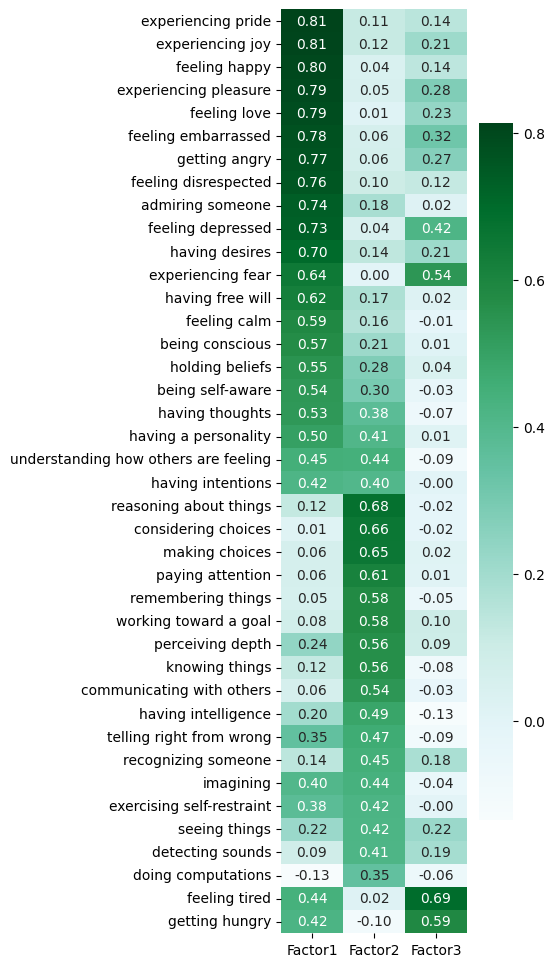

<Figure size 640x480 with 0 Axes>

In [45]:
loading_csv_path = os.path.join(fa_results_save_dir, 'loadings.csv')
loading_df = utils.read_file(loading_csv_path)

n_factors = 3

# Map names to python compatible names
items = utils.read_file(items_path)
item_mapping = dict(zip(loading_df['Unnamed: 0'], items))
loading_df['Unnamed: 0'] = loading_df['Unnamed: 0'].apply(lambda x: item_mapping[x])
column_mapper = {'Unnamed: 0': 'item'}
for i in range(n_factors):
    column_mapper['ML{}'.format(i + 1)] = 'Factor{}'.format(i + 1)

loading_df = loading_df.rename(columns=column_mapper)

# Assign categories based on maximum factor loading
loading_df_categories, _ = analysis.assign_categories(
    df=loading_df,
    item_colname='item',
    save_dir=fa_results_save_dir,
    overwrite=overwrite)

# Group items based on factor and sort in decreasing order of dominant factor
item_order = analysis.sort_by_loadings(
    loading_df=loading_df_categories,
    factors=['Factor{}'.format(i) for i in range(n_factors, 0, -1)]
)

# Visualize loadings
analysis.visualize_loadings(
    loading_df=loading_df,
    n_components=n_factors,
    orientation='vertical',
    keepcol_name='Factor',
    item_order=item_order,
    save_dir=fa_results_save_dir,
    save_ext=save_ext)

#### Run Mixed Effects Analysis with factor loading groupings and for item level analysis

In [14]:
separate_groups = False  # If True, create separate CSV for items of different groups
fa_categories_path = os.path.join(fa_results_save_dir, 'fa_groupings.json')
rating_df = utils.read_file(ratings_path)
fa_categories = utils.read_file(fa_categories_path)

utils.informal_log("Preparing dataframes for R analysis")
analysis.prepare_R_df(
    rating_df=rating_df,
    groupings=fa_categories,
    save_dir=fa_R_input_dir,
    separate_groups=separate_groups,
    overwrite=overwrite)

utils.informal_log("\nCopying item groupings with R formatting")
items = utils.read_file(items_path)
analysis.copy_groupings(
    groupings=fa_categories,
    all_items=items,
    save_dir=fa_R_input_dir)


[0426_082016] Preparing dataframes for R analysis
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis.csv
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/paths.json
[0426_082016] 
Copying item groupings with R formatting
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis_Factor1_items.txt
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis_Factor2_items.txt
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis_Factor3_items.txt
Saved file to ../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis_items.txt


In [ ]:
%%R
source("src/mixed_effect_models.R")

df_path <- "../analysis/mental_capacities/factor_analysis/results/R/input_files/factor_analysis.csv"
# Analysis based on factor loading groups
rating_analysis(
    df_path=df_path,
    save_dir="../analysis/mental_capacities/factor_analysis/results/R/results",
    save_txt=TRUE,
    n_components=3
)

# Item level analysis
cat("Running item level analysis...\n")
item_level_rating_analysis(
    df_path=df_path,
    save_dir="../analysis/mental_capacities/item_level",
    save_txt=TRUE
)


Running item level analysis...
Saving results to ../analysis/mental_capacities/item_level/results.txt


Correlation matrix not shown by default, as p = 160 > 12.
Use print(summary(model), correlation=TRUE)  or
    vcov(summary(model))        if you need it

NOTE: Results may be misleading due to involvement in interactions
refitting model(s) with ML (instead of REML)


### Code for processing additional measures
* Human-likeness
* Trust^
* Feeling^
* Self-efficacy of building LLMs*
* Self-efficacy of using LLMs^
* Confidence of mental capacity responses^

^ indicates only reported in some versions

\* indicates not reported

#### Obtain Mean Ratings & Run Mixed Effects Analysis for Attitudes

In [20]:
likert_mapping = {
    # Agree/Disagree Scales
    'Strongly disagree': 1,
    'Disagree': 2,
    'Somewhat disagree': 3,
    'Neither agree nor disagree': 4,
    'Somewhat agree': 5,
    'Agree': 6,
    'Strongly agree': 7,
    # Feeling
    'Extremely negative': 1,
    'Negative': 2,
    'Somewhat negative': 3,
    'Neutral': 4,
    'Somewhat positive': 5,
    'Positive': 6,
    'Extremely positive': 7,
    # Confidence
    'Not confident at all': 1,
    'Slightly confident': 2,
    'Fairly confident': 3,
    'Somewhat confident': 4,
    'Mostly confident': 5,
    'Confident': 6,
    'Very confident': 7,
    # Human-likeness
    'Not at all human-like': 1,
    'Slightly human-like': 2,
    'Fairly human-like': 3,
    'Somewhat human-like': 4,
    'Mostly human-like': 5,
    'Human-like': 6,
    'Very human-like': 7,
}

In [ ]:

# # Create DF for Attitudess
# dv_plot_type = 'pointplot'
# letter_labels = True


# if not letter_labels:
#     dv_labels = {
#         'anthro': 'General\nAnthropomorphism',
#         'trust': 'Trust',
#         'general': 'General\nAttitude',
#         'confidence': 'Confidence\nof Responses',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n ',
#         'se_use': 'Self-Efficacy\n(How to Use LLMs)'
#     }
# else:
#     dv_labels = {
#         'anthro': 'Anthro-\npomorphism\n\n(a)',
#         'trust': 'Trust\n\n\n(b)',
#         'general': 'General\nAttitude\n\n(c)',
#         'confidence': 'Confidence\nof Responses\n\n(d)',
#         'se_how': 'Self-Efficacy\n(How LLMs Work)\n\n(e)\n',
#         'se_use': 'Self-Efficacy\n(How to\nUse LLMs)\n(f)',

#         }

In [21]:
# Graph DVs from RAW data
attitudes_df = analysis.get_attitudes(
    df=post_exclusion_df,
    mapping=attitudes,
    likert_mapping=likert_mapping,
    save_dir=attitudes_save_dir,
    overwrite=True)

analysis.save_r_format(
    attitudes_df=attitudes_df,
    columns=attitudes.values(),
    save_dir=addit_dv_r_csv_save_dir,
    overwrite=True
)

# # Graph mean and 95% CI for Attitudess across conditions
# if dv_plot_type == 'bargraph':
#     analysis.dv_bargraph(
#         dv_df=dv_df,
#         save_ext=save_ext,
#         save_dir=addit_dv_graph_save_dir,
#         one_fig=True)
# elif dv_plot_type == 'pointplot':
#     analysis.dv_pointplot(
#         dv_df=dv_df,
#         dv_labels=dv_labels,
#         # letter_labels=True, # Whether to include (a), (b), ... in xtick labels
#         show=True,
#         save_ext=save_ext,
#         save_dir=addit_dv_graph_save_dir,
#         overwrite=True)
# else:
#     raise ValueError("plot_type '{}' not supported".format(dv_plot_type))

Saved file to ../analysis/attitudes/attitudes.csv
Saved file to ../analysis/attitudes/R/input_files/se_how.csv
Saved file to ../analysis/attitudes/R/input_files/se_use.csv
Saved file to ../analysis/attitudes/R/input_files/trust.csv
Saved file to ../analysis/attitudes/R/input_files/feeling.csv
Saved file to ../analysis/attitudes/R/input_files/humanness.csv
Saved file to ../analysis/attitudes/R/input_files/confidence.csv


In [ ]:
%%R

source("src/mixed_effect_models.R")

input_csv_dir <- "../analysis/attitudes/R/input_files"
input_csv_paths <- list.files(path=input_csv_dir, pattern="\\.csv$", full.names=TRUE)
save_dir <- "../analysis/attitudes/R/results"
for (path in input_csv_paths){
    attitude <- tools::file_path_sans_ext(basename(path))
    cat("Running R analysis for", attitude, "...\n")
    attitude_analysis(
        attitude = attitude,
        df_path = path,
        save_dir = save_dir
    )

}

Running R analysis for confidence ...
Saving results to ../analysis/attitudes/R/results/confidence_results.txt 
Running R analysis for feeling ...
Saving results to ../analysis/attitudes/R/results/feeling_results.txt 
Running R analysis for humanness ...
Saving results to ../analysis/attitudes/R/results/humanness_results.txt 
Running R analysis for se_how ...
Saving results to ../analysis/attitudes/R/results/se_how_results.txt 
Running R analysis for se_use ...
Saving results to ../analysis/attitudes/R/results/se_use_results.txt 
Running R analysis for trust ...
Saving results to ../analysis/attitudes/R/results/trust_results.txt 


## Exploratory Analyses


### Exploratory analysis comparing mental capacity items that are alluded to vs not in the intentional (companion) portrayal condtion

In [33]:
# Create file that separates items into alluded/not alluded (labeled mentioned/unmentioned for brevity)
def prep_mentioned_analysis(groupings_path,
                          items,
                          condition="intentional"):
    if condition == "intentional":
        # Items that are alluded to in intentional video
        related_set = set([
            "communicating with others",
            "having a personality",
            "having intelligence",
            "knowing things",
            "understanding how others are feeling"])
    else:
        raise ValueError("Condition {} not yet supported".format(condition))

    if os.path.exists(groupings_path):
        groupings = utils.read_file(groupings_path)
        return groupings
    else:
        groupings = {}

    # if condition in groupings:
    #     print(groupings[condition]['mentioned'] == list(related_set))
    #     print(groupings[condition]['mentioned'])
    #     print(list(related_set))
    unrelated_set = set(items) - related_set

    # related_list = sorted(list(related_set))
    # unrelated_list = sorted(list(unrelated_set))

    # Make sure items are in the same order as items list
    unrelated_items = []
    for item in items:
        if item in unrelated_set:
            unrelated_items.append(item)

    related_items = []
    for item in items:
        if item in related_set:
            related_items.append(item)

    groupings[condition] = {
        'unmentioned': unrelated_items,
        'mentioned': related_items
    }

    utils.write_file(groupings, groupings_path, overwrite=overwrite)
    return groupings

mentioned_groupings_path = os.path.join(PATH_TO_ROOT, 'data/alluded_groupings.json')
items = utils.read_file(items_path)
mentioned_groupings = prep_mentioned_analysis(
    groupings_path=mentioned_groupings_path,
    items=items,
    condition="intentional"
)

# Prep data for R analysis
rating_df = utils.read_file(ratings_path)
items = utils.read_file(items_path)
# semantic_groupings = utils.read_file(mentioned_groupings_path)

utils.informal_log("Preparing DFs for mentioned vs unmentioned R analysis")
analysis.prepare_R_df(
    rating_df=rating_df,
    groupings=mentioned_groupings,
    save_dir=mentioned_R_csv_save_dir,
    separate_groups=separate_groups,
    overwrite=True
)
utils.informal_log("\nCopying item groupings with R formatting")
analysis.copy_groupings(
    groupings=mentioned_groupings,
    all_items=items,
    save_dir=mentioned_R_csv_save_dir)


[0426_100723] Preparing DFs for mentioned vs unmentioned R analysis
Saved file to ../analysis/exploratory/mentioned_analysis/R/input_files/intentional.csv
Saved file to ../analysis/exploratory/mentioned_analysis/R/input_files/paths.json
[0426_100723] 
Copying item groupings with R formatting
Saved file to ../analysis/exploratory/mentioned_analysis/R/input_files/intentional_unmentioned_items.txt
Saved file to ../analysis/exploratory/mentioned_analysis/R/input_files/intentional_mentioned_items.txt
Saved file to ../analysis/exploratory/mentioned_analysis/R/input_files/intentional_items.txt


In [50]:
%%R
source("src/mixed_effect_models.R")

mentioned_items_analysis(
    df_path="../analysis/exploratory/mentioned_analysis/R/input_files/intentional.csv",
    save_dir="../analysis/exploratory/mentioned_analysis/R/results"
)

Saving results to ../analysis/exploratory/mentioned_analysis/R/results/results.txt 


NOTE: Results may be misleading due to involvement in interactions
NOTE: Results may be misleading due to involvement in interactions
refitting model(s) with ML (instead of REML)


### Correlations Between Mental Capacity Attributions and Attitudes

[0426_104059] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/correlations/correlations.json


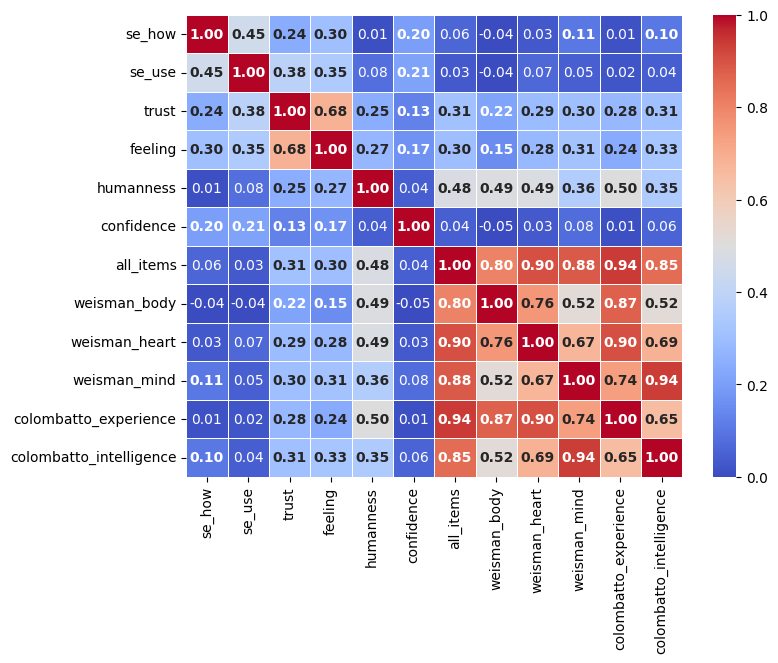

<Figure size 640x480 with 0 Axes>

In [68]:
attitudes_csv_path = os.path.join(attitudes_save_dir, 'attitudes.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

attitudes_df = utils.read_file(attitudes_csv_path)
rating_df = utils.read_file(rating_csv_path)

# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'weisman_body', 'weisman_heart', 'weisman_mind', 'colombatto_experience', 'colombatto_intelligence']
addit_dv_list = list(attitudes.values())

corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=attitudes_df,
    rating_df=rating_df,
    addit_dv_list=addit_dv_list,
    group_col_names=group_col_names,
    min_max_scale=False, # Makes no difference bc rank correlation
    p_threshold=p_threshold,
    save_dir=correlation_dir,
    overwrite=overwrite)



#### Correlations within Conditions

[0426_104043] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/correlations/Baseline/correlations.json


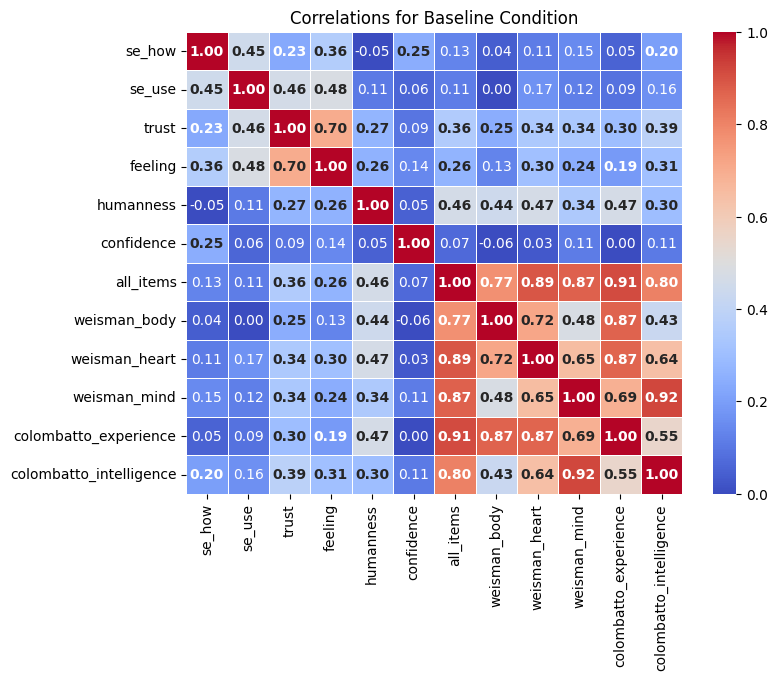

[0426_104044] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/correlations/Mechanistic/correlations.json


<Figure size 640x480 with 0 Axes>

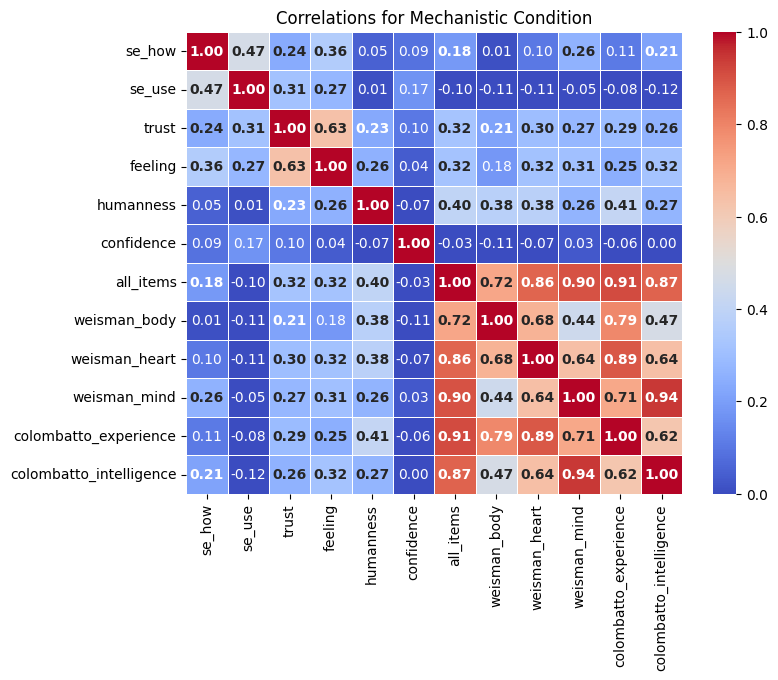

[0426_104045] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/correlations/Functional/correlations.json


<Figure size 640x480 with 0 Axes>

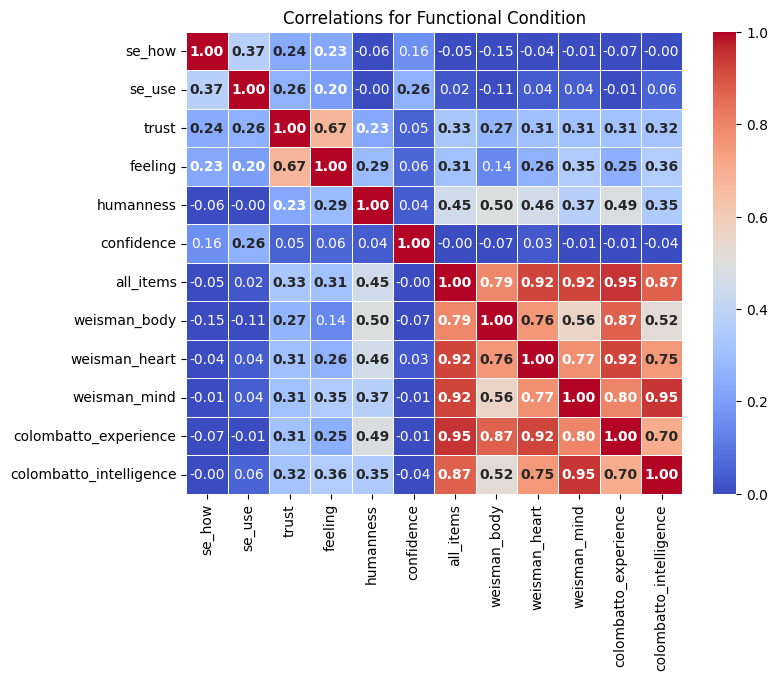

[0426_104046] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/correlations/Intentional/correlations.json


<Figure size 640x480 with 0 Axes>

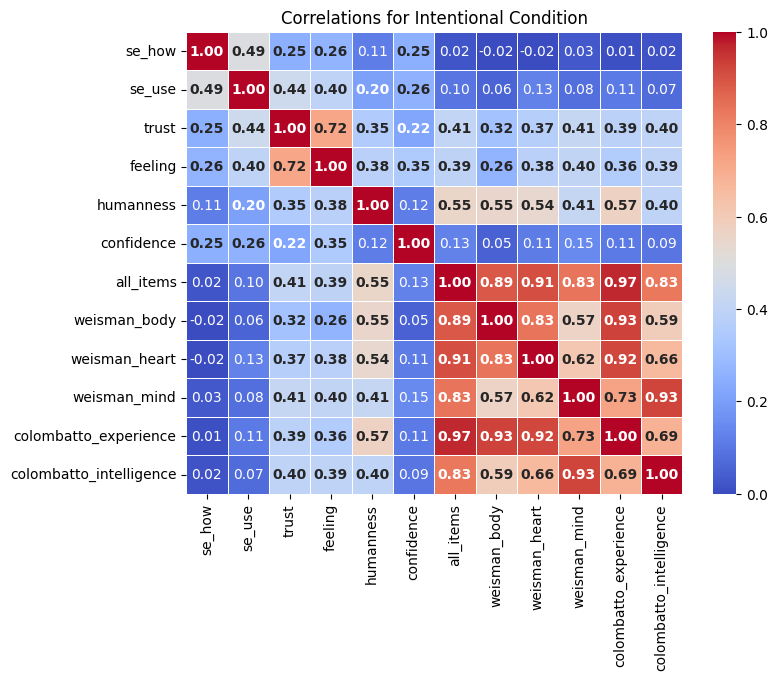

<Figure size 640x480 with 0 Axes>

In [67]:
attitudes_csv_path = os.path.join(attitudes_save_dir, 'attitudes.csv')
rating_csv_path = os.path.join(ratings_save_dir, 'ratings.csv')
p_threshold = 0.05

addit_dv_df = utils.read_file(attitudes_csv_path)
rating_df = utils.read_file(rating_csv_path)

# add to addit_dv_df the mean category ratings
group_col_names = ['all_items', 'weisman_body', 'weisman_heart', 'weisman_mind', 'colombatto_experience', 'colombatto_intelligence']
addit_dv_list = list(attitudes.values())

for condition in conditions:
    cond_corr_dir = os.path.join(correlation_dir, condition)
    utils.ensure_dir(cond_corr_dir)
    cur_addit_dv_df = addit_dv_df[addit_dv_df['condition'] == condition]
    cur_rating_df = rating_df[rating_df['condition'] == condition]

    assert len(cur_addit_dv_df) == len(cur_rating_df)

    corr_dict = analysis.addit_dv_correlations(
        addit_dv_df=cur_addit_dv_df,
        rating_df=cur_rating_df,
        addit_dv_list=addit_dv_list,
        group_col_names=group_col_names,
        min_max_scale=False, # Makes no difference bc rank correlation
        p_threshold=p_threshold,
        title='Correlations for {} Condition'.format(condition),
        save_dir=cond_corr_dir,
        overwrite=overwrite)




##### Visualize correlations of mean rating with all other Attitudess

#### Save performance on the mechanistic quiz for participants in mechanistic condition

[0426_103959] attention question: 52.89% of participants answered correctly
[0426_103959] sampling question: 81.82% of participants answered correctly
[0426_103959] data_quantity question: 97.52% of participants answered correctly
[0426_103959] generation question: 90.08% of participants answered correctly


/n/fs/ac-aiexhibit/portraying_llms/code/src/visualizations.py:815: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


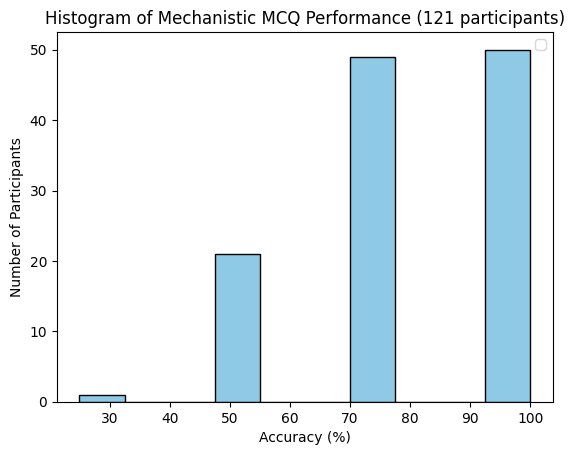

Saved file to ../analysis/exploratory/mechanistic_quiz/mech_accuracy.csv
[0426_104000] Computing correlations with mechanistic quiz acc. Only using rows in mechanistic condition (116 rows)
[0426_104000] Bolding items whose p-values < 0.0500000
Saved file to ../analysis/exploratory/mechanistic_quiz/mech_correlations.json


<Figure size 640x480 with 0 Axes>

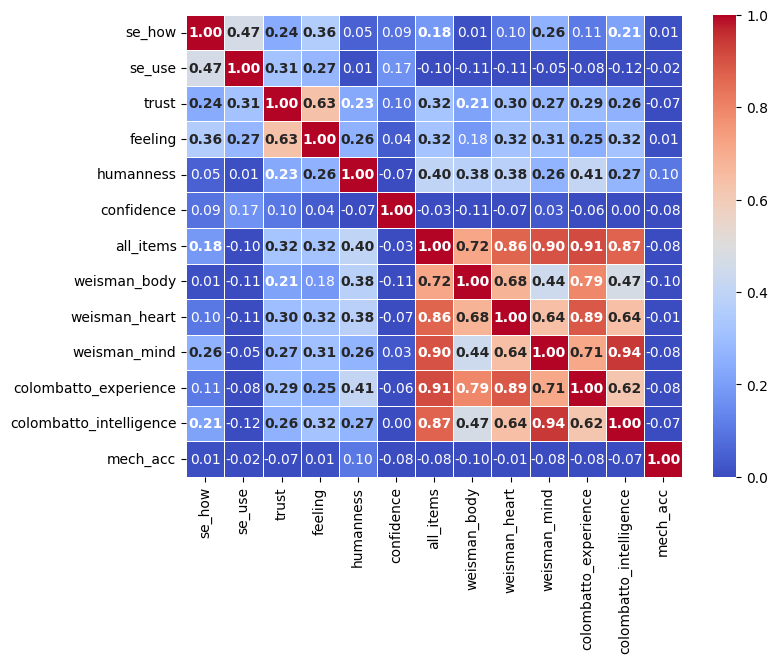

<Figure size 640x480 with 0 Axes>

In [66]:
mech_save_dir = os.path.join(exploratory_save_dir, 'mechanistic_quiz')
utils.ensure_dir(mech_save_dir)
mech_quiz_df = analysis.mechanistic_mcq_analysis(
    df=df,
    save_dir=mech_save_dir,
    overwrite=True)

# Re-calculate correlation matrix with mechanistic quiz performance (only for participants in mechanistic condition)
p_threshold = 0.05
mech_corr_dict = analysis.addit_dv_correlations(
    addit_dv_df=addit_dv_df,
    rating_df=rating_df,
    addit_dv_list=addit_dv_list,
    group_col_names=group_col_names,
    mech_quiz_df=mech_quiz_df,
    p_threshold=p_threshold,
    save_dir=mech_save_dir,
    overwrite=True
)


#### Free Response for:
Please explain your reason (for your rating of human-likeness of LLMs) in 1-3 sentences


In [ ]:
coarse_anthro_qid = 'DVCoarse2'
coarse_anthro_addit_qid = 'DVCoarse1'
coarse_anthro_save_path = os.path.join(exploratory_save_dir, 'humanness_reasons.txt')

coarse_anthro_df = analysis.save_frq(
    df=df,
    q_id=coarse_anthro_qid,
    addit_q_id=coarse_anthro_addit_qid,
    frq_save_path=coarse_anthro_save_path)

[0426_103512] 66fc12c9f1dfb65972597a3f [Slightly human-like]: 
	i believe the have the capacity to feel and be able to experience their own will / emotions but with that, i believe it would be very dangerous if robots were "human like" and able to think on their own
[0426_103512] 6674e27d7068f7b381b54c73 [Somewhat human-like]: 
	There basically computers or some type of computer generated AI
[0426_103512] 610786681f59e722c0a8b371 [Slightly human-like]: 
	try to sound human and express things in a way that makes them have a personality, try to be human like
[0426_103512] 66952d5507cd937cf7c2a35d [Fairly human-like]: 
	They understand very well by taking information from a lot of data but they are programmed that way. I guess we are too but they lack souls so thats the only difference.
[0426_103512] 6157d22b9998f96a77f41567 [Somewhat human-like]: 
	they aren't all like this but the one called Pi is the one that I think seems somewhat humanlike, like it will say it thinks or feels. but it

### Inter-rater Reliability (Fleiss' Kappa, Krippendorff's Alpha) and Inter-item Reliability (Cronbach's alpha)

Inter-item reliability only calculated for a few subsets of items

In [63]:
# Run IRR (inter rater)
# rating_df_path = 'data/pilot/analysis_min_20/ratings.csv'
# ratings_path = os.path.join(ratings_save_dir, 'ratings.csv')
# dv_items_path = 'dependent_variables/full_list_40.txt'
# categories_path = 'dependent_variables/groupings_colombatto_{}.json'.format(grouping_version)

rating_df = utils.read_file(ratings_path)
dv_items = utils.read_file(items_path)
groupings = utils.read_file(categories_path)
# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']

results = analysis.calculate_irr(
    rating_df=rating_df,
    dv_items=dv_items,
    conditions=conditions,
    groupings=groupings,
    save_dir=reliability_save_dir)

# Unpack outputs
# for name, value in results.items():
#     for vname, vvalue in value.items():
#         utils.informal_log("{}-{}: {:.4f}".format(name, vname, vvalue))
#     print("")



Saved file to ../analysis/exploratory/reliability/interrater.json


In [62]:
# Run IIR (inter item)
# rating_df = utils.read_file(rating_df_path)
dv_itemss = [
    ['feeling happy', 'experiencing joy'],
    ['feeling tired', 'experiencing fear'],
    'feeling ',
    ['getting hungry', 'doing computations'],
    ['feeling disrespected', 'feeling love']
]
# conditions = ['Baseline', 'Mechanistic', 'Functional', 'Intentional']
# iir_save_dir = os.path.dirname(rating_df_path)

iir_results = analysis.calculate_iir(
    rating_df=rating_df,
    dv_itemss=dv_itemss,
    conditions=conditions,
    save_dir=reliability_save_dir
)

for key, result_obj in iir_results.items():
    utils.informal_log(key)
    for condition, results in result_obj.items():
        utils.informal_log("{}: {}".format(condition, results))
    print("")

Saved file to ../analysis/exploratory/reliability/interitem.json
[0426_103740] feeling_happy-experiencing_joy
[0426_103740] Baseline: {'cronbachs_alpha': 0.8703943668858958, 'ci': [0.813, 0.91]}
[0426_103740] Mechanistic: {'cronbachs_alpha': 0.7273918026524038, 'ci': [0.606, 0.811]}
[0426_103740] Functional: {'cronbachs_alpha': 0.6675551409342304, 'ci': [0.522, 0.769]}
[0426_103740] Intentional: {'cronbachs_alpha': 0.8859518672894473, 'ci': [0.836, 0.921]}
[0426_103740] overall: {'cronbachs_alpha': 0.8398560348864061, 'ci': [0.808, 0.866]}

[0426_103740] feeling_tired-experiencing_fear
[0426_103740] Baseline: {'cronbachs_alpha': 0.8428623973190572, 'ci': [0.774, 0.891]}
[0426_103740] Mechanistic: {'cronbachs_alpha': 0.960624468855245, 'ci': [0.943, 0.973]}
[0426_103740] Functional: {'cronbachs_alpha': 0.790380761523046, 'ci': [0.699, 0.854]}
[0426_103740] Intentional: {'cronbachs_alpha': 0.6815220763106205, 'ci': [0.541, 0.779]}
[0426_103740] overall: {'cronbachs_alpha': 0.810776304552